# NN Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
import Functions_Modularity as fm

In [5]:
train_set = pd.read_csv("../TrainTestSet/TrainSet1.csv")
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,AgeFare,SibPar
0,0,3,1,22.0,1,0,7.2500,0,1,159.5000,1
1,1,1,0,38.0,1,0,71.2833,0,0,2708.7654,1
2,1,3,0,26.0,0,0,7.9250,0,1,206.0500,0
3,1,1,0,35.0,1,0,53.1000,0,1,1858.5000,1
4,0,3,1,35.0,0,0,8.0500,0,1,281.7500,0


### Creating x_train, y_train set

In [6]:
y = train_set['Survived']
x = train_set.drop(['Survived'], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [8]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.fit_transform(X_test, y_test)

### Creating a TF-Keras model

In [10]:
#Using the sigmoid activation function to get the best weights and biases for the created model (below)
model_NN = Sequential(
    [
        tf.keras.Input(shape=(10,)),
        Dense(units=32, activation='sigmoid'),
        Dense(units=16, activation='sigmoid'),
        Dense(units=1, activation='sigmoid'),
    ], name="model_NN")

model_NN.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=BinaryCrossentropy())

#### Using an early_stop

In [11]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

### Fitting 

In [12]:
#Fitting the model
model_NN.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/1000
23/23 [==============================] - 0s 9ms/step - loss: 0.6577 - val_loss: 0.6619
Epoch 2/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.6494 - val_loss: 0.6528
Epoch 3/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.6414 - val_loss: 0.6425
Epoch 4/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.6321 - val_loss: 0.6310
Epoch 5/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.6198 - val_loss: 0.6156
Epoch 6/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.6060 - val_loss: 0.5997
Epoch 7/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.5929 - val_loss: 0.5813
Epoch 8/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.5756 - val_loss: 0.5629
Epoch 9/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.5609 - val_loss: 0.5445
Epoch 10/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.5468 - val_loss: 0.5306

23/23 [==============================] - 0s 1ms/step - loss: 0.4381 - val_loss: 0.4092
Epoch 83/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4386 - val_loss: 0.4095
Epoch 84/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4380 - val_loss: 0.4082
Epoch 85/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4385 - val_loss: 0.4089
Epoch 86/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4373 - val_loss: 0.4102
Epoch 87/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4374 - val_loss: 0.4102
Epoch 88/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4377 - val_loss: 0.4101
Epoch 89/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4375 - val_loss: 0.4093
Epoch 90/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4371 - val_loss: 0.4097
Epoch 91/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4377 - val_loss: 0.4097
Epoc

23/23 [==============================] - 0s 1ms/step - loss: 0.4267 - val_loss: 0.3963
Epoch 163/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4266 - val_loss: 0.3979
Epoch 164/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4267 - val_loss: 0.3964
Epoch 165/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4266 - val_loss: 0.3966
Epoch 166/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4260 - val_loss: 0.3953
Epoch 167/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4263 - val_loss: 0.3956
Epoch 168/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4260 - val_loss: 0.3951
Epoch 169/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4259 - val_loss: 0.3949
Epoch 170/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4257 - val_loss: 0.3947
Epoch 171/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4260 - val_loss: 0.

23/23 [==============================] - 0s 1ms/step - loss: 0.4175 - val_loss: 0.3827
Epoch 243/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4179 - val_loss: 0.3841
Epoch 244/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4171 - val_loss: 0.3826
Epoch 245/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4169 - val_loss: 0.3831
Epoch 246/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4174 - val_loss: 0.3839
Epoch 247/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4169 - val_loss: 0.3817
Epoch 248/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4160 - val_loss: 0.3838
Epoch 249/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4168 - val_loss: 0.3848
Epoch 250/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4160 - val_loss: 0.3835
Epoch 251/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4160 - val_loss: 0.

23/23 [==============================] - 0s 1ms/step - loss: 0.4065 - val_loss: 0.3771
Epoch 323/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4069 - val_loss: 0.3744
Epoch 324/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4069 - val_loss: 0.3728
Epoch 325/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4065 - val_loss: 0.3740
Epoch 326/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4062 - val_loss: 0.3744
Epoch 327/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4055 - val_loss: 0.3748
Epoch 328/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4060 - val_loss: 0.3742
Epoch 329/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4056 - val_loss: 0.3749
Epoch 330/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4056 - val_loss: 0.3759
Epoch 331/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4060 - val_loss: 0.

### Plotting the loss metrics vs epoch history

<AxesSubplot:>

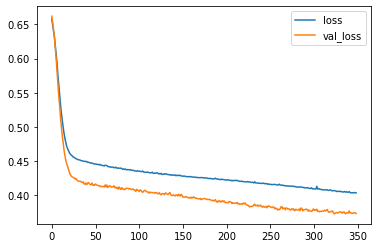

In [13]:
loss_mol = pd.DataFrame(model_NN.history.history)
loss_mol.plot()

In [14]:
#Checking the 1st train_set prediction (y = 0)
print(model_NN.predict(X_train[0].reshape(1,10)))

1/1 [==============================] - 0s 61ms/step
[[0.984075]]


### Obtaining the model results

In [15]:
print(model_NN.evaluate(X_test, y_test))
print(model_NN.evaluate(X_train, y_train))

6/6 [==============================] - 0s 601us/step - loss: 0.3734
0.3733925521373749
23/23 [==============================] - 0s 591us/step - loss: 0.4022
0.4021663963794708


In [16]:
#Obtaining the prediction for each set. Using function (pred_output) to unpack the result
output_train = fm.pred_output(model_NN.predict(X_train))
output_test = fm.pred_output(model_NN.predict(X_test))

6/6 [==============================] - 0s 601us/step


## Model Results

In [17]:
#Printing the model accuracy
print('Train Accuracy: %f'%(np.mean(output_train == y_train) * 100))
print('Test Accuracy: %f'%(np.mean(output_test == y_test) * 100))

Train Accuracy: 83.684951
Test Accuracy: 83.146067


In [18]:
#Checking the model error (% of incorrect guesses) using function (eval_err)
error_test = fm.eval_err(y_test, output_test)
error_train = fm.eval_err(y_train, output_train)
print(f"error test:  {error_test :0.3f}")
print(f"error train: {error_train :0.3f}")

error test:  0.169
error train: 0.163


In [19]:
print(classification_report(y_test, output_test))
print(confusion_matrix(y_test, output_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       107
           1       0.86      0.69      0.77        71

    accuracy                           0.83       178
   macro avg       0.84      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178

[[99  8]
 [22 49]]


### Saving model

In [20]:
model_NN.summary()
model_NN.save('Model_tf_NN.h5')

Model: "model_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


## Building a Deep NN
##### Models must be identical
Since the built model is a forward propagation one, the weights must be calculated beforehand

In [231]:
#Create code that runs per layer:
    #Every node uses its weights and np.dots(x, w) + b // Uses the result in the sigmoid function
    #Each layer output is equal to the node prediction
    #Layer input takes the last layer's output

### Getting the tf imported models layers weights

In [21]:
[l1, l2, l3] = model_NN.layers

In [22]:
#Unpacking weights and biases
W1_tmp, b1_tmp = l1.get_weights()
W2_tmp, b2_tmp = l2.get_weights()
W3_tmp, b3_tmp = l3.get_weights()

In [23]:
#Just a shape visualization (every output == next input)
print(W1_tmp.shape)
print(W2_tmp.shape)
print(W3_tmp.shape)
print(X_train.shape)
print(X_test.shape)

(10, 32)
(32, 16)
(16, 1)
(711, 10)
(178, 10)


### Layer function
#### Takes the weights, biases, activation function (sigmoid) and calculates the prediction for each node
Considering the input (initially the training data), the layer uses np.dot to multiple the respective input values for the weights, inserts in the activation function and returns the prediction for each node

In [24]:
def layers(a_in, W, b, g):
    #Use the input a_in
    units = W.shape[1]
    a_out = np.zeros(units)
    
    for i in range(units):
        #Activation function input
        res = np.dot(W[:,i], a_in) + b[i]
        a_out[i] = g(res)
        
    return a_out

### Sequential 
#### Creates the "network"
Uses the layers function to get each layer output and propagate it to the next layer

In [25]:
def sequential(x, W1, b1, W2, b2, W3, b3, g):
    #Initial input value is the training/test set
    a1 = layers(x, W1, b1, g)
    a2 = layers(a1, W2, b2, g)
    a3 = layers(a2, W3, b3, g)
    
    return a3

### Runing the NN built model
#####  Iterates over input items returning the prediction and setting the prediction to a 1/0 

In [26]:
def run_nn_built(X, threshold):
    ## Get No examples to run prediction
    examples = X.shape[0]
    prediction_nn_built = np.zeros(examples)
    
    for i in range(examples):
        ## Iterate over all examples and add it to prediction
        prob = sequential(X[i], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp, g=fm.sigmoid)
        
        #Takes the prediction as a 1/0 output
        if prob >= threshold:
            prob = 1
        else:
            prob = 0
            
        prediction_nn_built[i] = prob
        
    return prediction_nn_built

In [27]:
#Runs model in bot sets
pred_nn_built_train = run_nn_built(X_train, 0.5)
pred_nn_built_test = run_nn_built(X_test, 0.5)

## NN Built Model Results

In [28]:
#Error % in each set
error_test = fm.eval_err(y_test, pred_nn_built_test)
error_train = fm.eval_err(y_train, pred_nn_built_train)
print(f"error test:  {error_test :0.3f}")
print(f"error train: {error_train :0.3f}")

error test:  0.169
error train: 0.163


In [29]:
#Model accuracy per set
print('Train Accuracy: %f'%(np.mean(pred_nn_built_train == y_train) * 100))
print('Test Accuracy: %f'%(np.mean(pred_nn_built_test == y_test) * 100))

Train Accuracy: 83.684951
Test Accuracy: 83.146067


In [30]:
print(classification_report(y_test, pred_nn_built_test))
print(confusion_matrix(y_test, pred_nn_built_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       107
           1       0.86      0.69      0.77        71

    accuracy                           0.83       178
   macro avg       0.84      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178

[[99  8]
 [22 49]]


## Improving the calculation time using matmul instead of np.dot()

In [31]:
def layers_matmul(a_in, W, b, g):
    #Use the input a_in
    #Instead of a np.dot the z (activation function input) uses matmul to reduce the calculation demands
    res = np.matmul(a_in, W) + b
    a_out[i] = g(res)
        
    return a_out

In [32]:
def sequential_matmul(x, W1, b1, W2, b2, W3, b3, g):
    #Same logic as the above, changes the function call only
    a1 = layers_matmul(x, W1, b1, g)
    a2 = layers_matmul(a1, W2, b2, g)
    a3 = layers_matmul(a2, W3, b3, g)
    
    return a3

In [33]:
def run_nn_built_matmul(X, threshold):
    ## Get No examples to run prediction
    examples = X.shape[0]
    prediction_nn_built = np.zeros(examples)
    
    for i in range(examples):
        ## Iterate over all examples and add it to prediction
        prob = sequential_matmul(X[i], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp, g=fm.sigmoid)
        
        if prob >= threshold:
            prob = 1
        else:
            prob = 0
            
        prediction_nn_built[i] = prob
        
    return prediction_nn_built

In [34]:
pred_nn_built_train_matmul = run_nn_built(X_train, 0.5)
pred_nn_built_test_matmul = run_nn_built(X_test, 0.5)

## NN Built Matmul Results

In [35]:
error_test = fm.eval_err(y_test, pred_nn_built_test_matmul)
error_train = fm.eval_err(y_train, pred_nn_built_train_matmul)
print(f"error test:  {error_test :0.3f}")
print(f"error train: {error_train :0.3f}")

error test:  0.169
error train: 0.163


In [36]:
print('Test Accuracy: %f'%(np.mean(pred_nn_built_test_matmul == y_test) * 100))
print('Train Accuracy: %f'%(np.mean(pred_nn_built_train_matmul == y_train) * 100))

Test Accuracy: 83.146067
Train Accuracy: 83.684951


In [37]:
print(classification_report(y_test, pred_nn_built_test_matmul))
print(confusion_matrix(y_test, pred_nn_built_test_matmul))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       107
           1       0.86      0.69      0.77        71

    accuracy                           0.83       178
   macro avg       0.84      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178

[[99  8]
 [22 49]]
